In [29]:
import copy
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import copy
import re
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

RANDOM_STATE = 101

In [30]:
org_df = pd.read_csv("AirQualityUCI.csv", sep=';').dropna(how='all')[['Date','Time','PT08.S1(CO)','RH','AH','T']]
df = org_df.copy()
df.describe()

,PT08.S1(CO),RH,AH,T
count,9357.000000,9357.000000,9357.000000,9357.000000
mean,1048.990061,39.485380,-6.837604,9.778305
std,329.832710,51.216145,38.976670,43.203623
min,-200.000000,-200.000000,-200.000000,-200.000000
25%,921.000000,34.100000,0.692300,10.900000
50%,1053.000000,48.600000,0.976800,17.200000
75%,1221.000000,61.900000,1.296200,24.100000
max,2040.000000,88.700000,2.231000,44.600000


In [31]:
df['ts'] = df['Date'] + " " + df['Time']
df.drop(columns=['Date', 'Time'], inplace=True)
df['ts'] = df['ts'].str.replace('.', ':', regex=False)
df['ts'] = pd.to_datetime(df['ts'])
df.set_index('ts', inplace=True)
df.sort_index(inplace=True)


In [32]:
df

,PT08.S1(CO),RH,AH,T
ts,,,,
2004-01-04 00:00:00,1143.0,61.6,0.8593,12.0
2004-01-04 01:00:00,1044.0,63.9,0.8652,11.5
2004-01-04 02:00:00,1034.0,67.2,0.8630,10.7
2004-01-04 03:00:00,956.0,73.1,0.8394,9.0
2004-01-04 04:00:00,909.0,66.6,0.8299,10.2
...,...,...,...,...
2005-12-03 19:00:00,1177.0,47.8,0.7582,14.0
2005-12-03 20:00:00,1383.0,51.4,0.7760,13.2
2005-12-03 21:00:00,1363.0,56.1,0.7832,12.0


<AxesSubplot: xlabel='ts', ylabel='RH'>

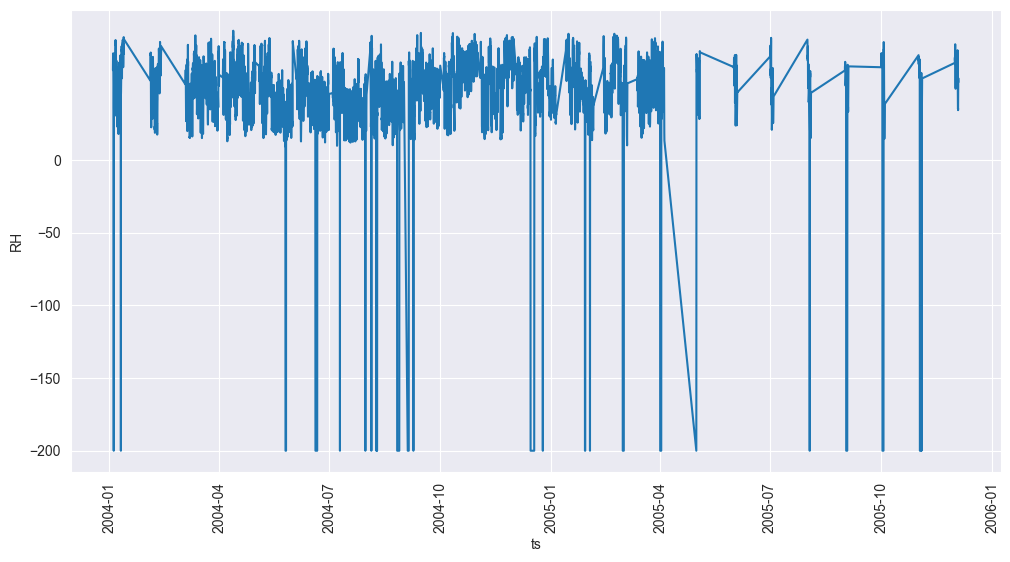

In [33]:
fig = plt.figure(figsize=(12, 6))
plt.xticks(rotation= 90)
plt.xticks(rotation= 90)
plt.yticks(range(-200, 50, 50))


sns.lineplot(df, x = 'ts', y='RH')

In [34]:
df.replace(to_replace=-200, value=np.nan, inplace=True)

In [35]:
RH_ratio = df['RH'].isna().sum()/len(df['RH'])
print('RH has {:.2f}% of missing data'.format(RH_ratio*100))

RH has 3.91% of missing data


In [36]:
RH_ratio = df['RH'].isna().sum()/len(df['RH'])
print('RH has {:.2f}% of missing data'.format(RH_ratio*100))

RH has 3.91% of missing data


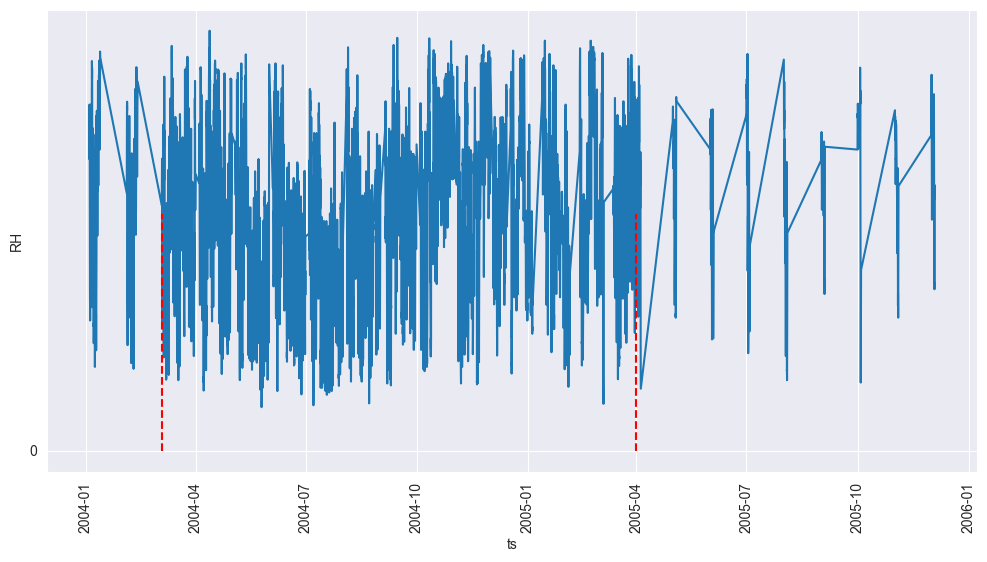

In [37]:
fig = plt.figure(figsize=(12, 6))
plt.xticks(rotation= 90)
plt.xticks(rotation= 90)
plt.yticks(range(-200, 50, 50))
sns.lineplot(df, x = 'ts', y='RH')
plt.vlines(x=pd.Timestamp('2004-03-04'), ymin=0, ymax=50, colors='red', linestyles='dashed')
plt.vlines(x=pd.Timestamp('2005-04-01'), ymin=0, ymax=50, colors='red', linestyles='dashed')

In [38]:
df = df.loc[(df.index >= pd.Timestamp("2004-03-04"))&(df.index < pd.Timestamp('2005-04-01 00:00:00'))]

In [39]:
df

,PT08.S1(CO),RH,AH,T
ts,,,,
2004-03-04 00:00:00,1254.0,51.8,0.9990,17.1
2004-03-04 01:00:00,1141.0,54.2,0.9933,16.2
2004-03-04 02:00:00,1141.0,58.2,0.9886,15.1
2004-03-04 03:00:00,1042.0,57.6,0.9796,15.1
2004-03-04 04:00:00,986.0,58.0,0.9488,14.5
...,...,...,...,...
2005-03-31 19:00:00,1102.0,45.2,0.9123,17.8
2005-03-31 20:00:00,976.0,47.3,0.8686,16.3
2005-03-31 21:00:00,895.0,44.8,0.8244,16.3


<AxesSubplot: xlabel='ts', ylabel='RH'>

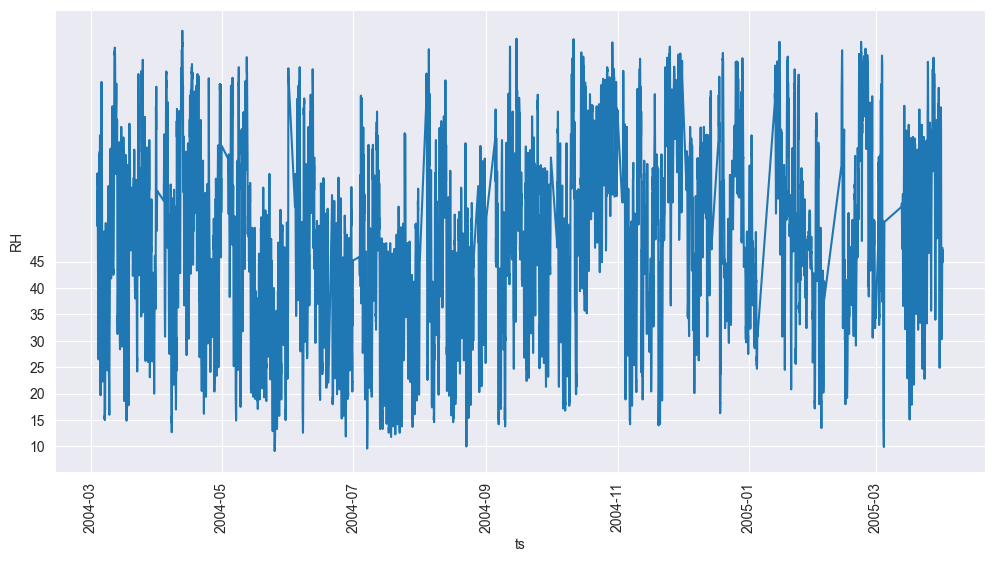

In [40]:
fig = plt.figure(figsize=(12, 6))
plt.xticks(rotation= 90)
plt.xticks(rotation= 90)
plt.yticks(range(-10, 50, 5))


sns.lineplot(df, x = 'ts', y='RH')

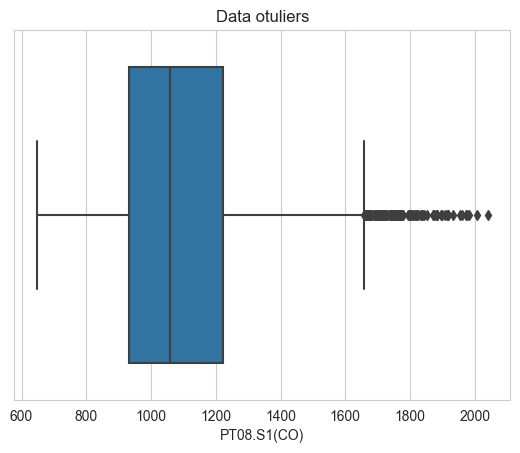

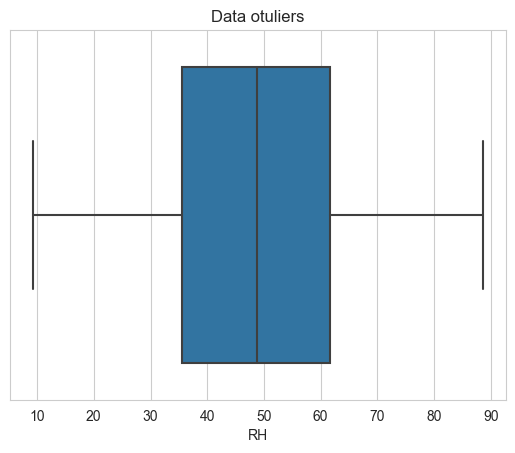

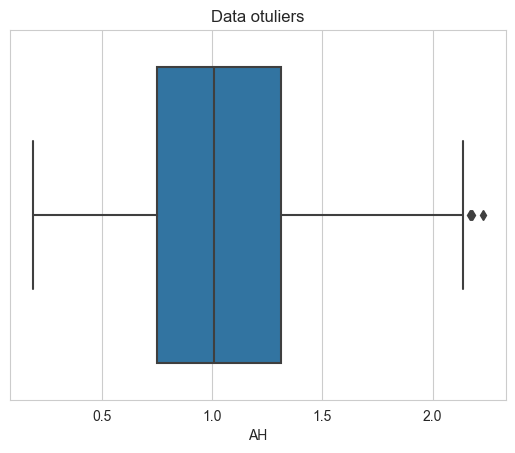

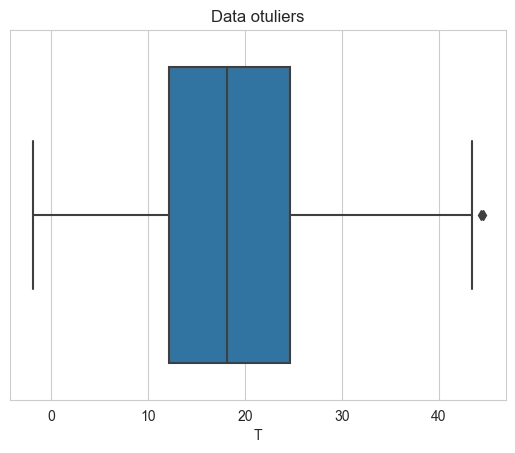

In [41]:
sns.set_style('whitegrid')
for i in df.columns[::]:
    sns.boxplot(x=df[i])
    plt.title('Data otuliers')
    plt.show()

In [42]:
from IPython.display import display
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

outliers = {}
for col in df.columns:
    outlier_rows = (df[col] < lower_bound[col]) | (df[col] > upper_bound[col])
    outliers[col] = df[col][outlier_rows]
    df = df[~outlier_rows]

print("Removed rows with outliers:")
display(outliers)

Removed rows with outliers:


{'PT08.S1(CO)': ts
 2004-03-04 19:00:00    1697.0
 2004-03-14 19:00:00    1808.0
 2004-03-14 20:00:00    1898.0
 2004-03-15 08:00:00    1797.0
 2004-03-15 09:00:00    1961.0
                         ...  
 2005-03-23 20:00:00    1663.0
 2005-03-24 19:00:00    1726.0
 2005-03-24 20:00:00    1818.0
 2005-03-24 21:00:00    1667.0
 2005-03-25 19:00:00    1673.0
 Name: PT08.S1(CO), Length: 111, dtype: float64,
 'RH': Series([], Name: RH, dtype: float64),
 'AH': ts
 2004-08-08 12:00:00    2.1806
 2004-12-08 08:00:00    2.1719
 2004-12-09 13:00:00    2.1766
 2004-12-09 16:00:00    2.2310
 Name: AH, dtype: float64,
 'T': ts
 2004-07-22 15:00:00    44.3
 2004-07-22 16:00:00    44.6
 Name: T, dtype: float64}

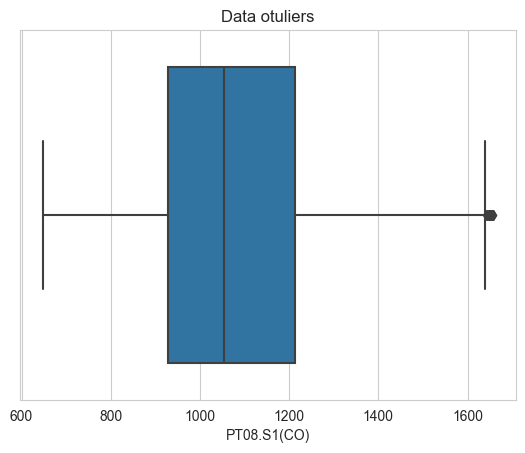

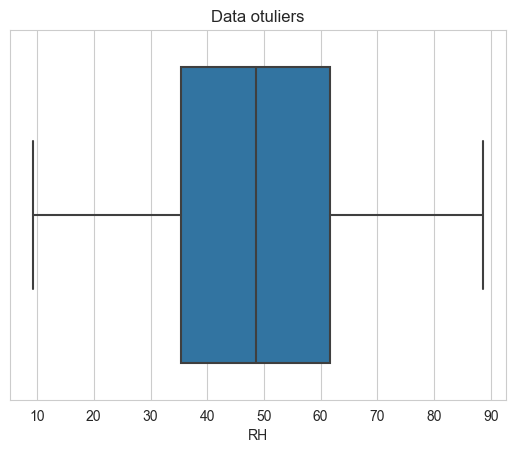

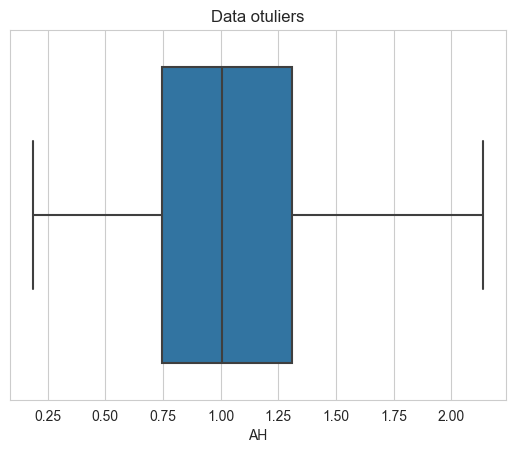

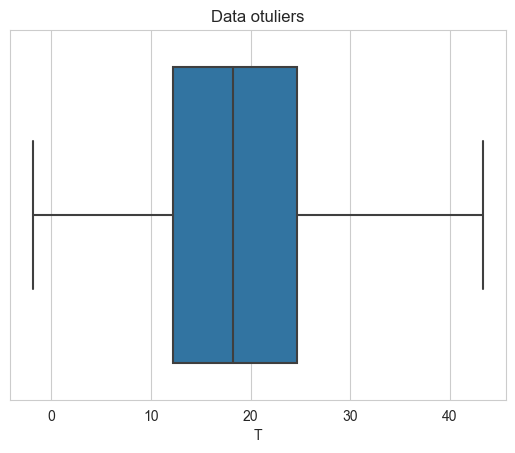

In [43]:
#there is not much to see except on the PT08.S1(CO) but here we go
sns.set_style('whitegrid')
for i in df.columns[::]:
    sns.boxplot(x=df[i])
    plt.title('Data otuliers')
    plt.show()

In [44]:
df

,PT08.S1(CO),RH,AH,T
ts,,,,
2004-03-04 00:00:00,1254.0,51.8,0.9990,17.1
2004-03-04 01:00:00,1141.0,54.2,0.9933,16.2
2004-03-04 02:00:00,1141.0,58.2,0.9886,15.1
2004-03-04 03:00:00,1042.0,57.6,0.9796,15.1
2004-03-04 04:00:00,986.0,58.0,0.9488,14.5
...,...,...,...,...
2005-03-31 19:00:00,1102.0,45.2,0.9123,17.8
2005-03-31 20:00:00,976.0,47.3,0.8686,16.3
2005-03-31 21:00:00,895.0,44.8,0.8244,16.3


In [45]:
df = df.reset_index()
df['weekday'] = df['ts'].dt.dayofweek
df['time'] = df['ts'].dt.hour
df

,ts,PT08.S1(CO),RH,AH,T,weekday,time
0,2004-03-04 00:00:00,1254.0,51.8,0.9990,17.1,3,0
1,2004-03-04 01:00:00,1141.0,54.2,0.9933,16.2,3,1
2,2004-03-04 02:00:00,1141.0,58.2,0.9886,15.1,3,2
3,2004-03-04 03:00:00,1042.0,57.6,0.9796,15.1,3,3
4,2004-03-04 04:00:00,986.0,58.0,0.9488,14.5,3,4
...,...,...,...,...,...,...,...
8140,2005-03-31 19:00:00,1102.0,45.2,0.9123,17.8,3,19
8141,2005-03-31 20:00:00,976.0,47.3,0.8686,16.3,3,20
8142,2005-03-31 21:00:00,895.0,44.8,0.8244,16.3,3,21
8143,2005-03-31 22:00:00,886.0,47.1,0.8273,15.6,3,22


In [46]:
df

,ts,PT08.S1(CO),RH,AH,T,weekday,time
0,2004-03-04 00:00:00,1254.0,51.8,0.9990,17.1,3,0
1,2004-03-04 01:00:00,1141.0,54.2,0.9933,16.2,3,1
2,2004-03-04 02:00:00,1141.0,58.2,0.9886,15.1,3,2
3,2004-03-04 03:00:00,1042.0,57.6,0.9796,15.1,3,3
4,2004-03-04 04:00:00,986.0,58.0,0.9488,14.5,3,4
...,...,...,...,...,...,...,...
8140,2005-03-31 19:00:00,1102.0,45.2,0.9123,17.8,3,19
8141,2005-03-31 20:00:00,976.0,47.3,0.8686,16.3,3,20
8142,2005-03-31 21:00:00,895.0,44.8,0.8244,16.3,3,21
8143,2005-03-31 22:00:00,886.0,47.1,0.8273,15.6,3,22


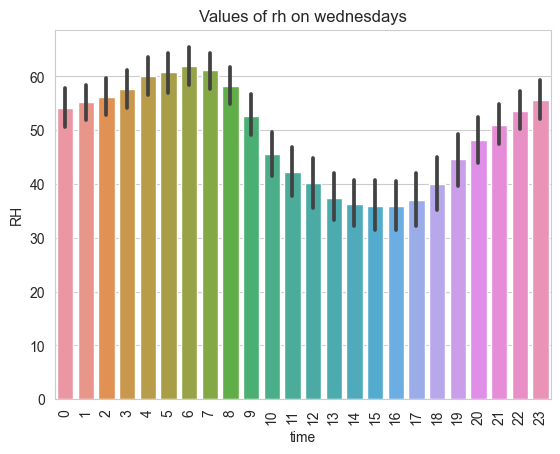

Ppeak is around 5Am and 7AM and between 22 PM and 0PM


In [47]:
RH_wd = df[df['weekday']==3]
sns.barplot(x='time', y='RH', data=RH_wd.sort_values('time'))
plt.title('Values of rh on wednesdays')
plt.xticks(rotation=90)
plt.show()

print('Ppeak is around 5Am and 7AM and between 22 PM and 0PM')

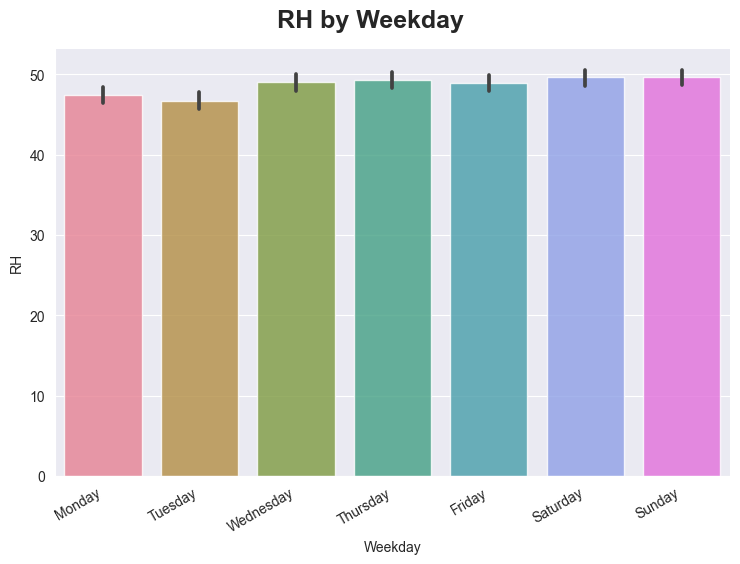

In [48]:
#style of the plot
sns.set_style('darkgrid')

# categorical plot 
ax = sns.catplot(x='weekday', y='RH', data=df, kind='bar', palette='husl', alpha=0.8, height=5, aspect=1.5)

# title and ax labels
ax.fig.suptitle('RH by Weekday', fontsize=18, y=1.05, fontweight='bold')
ax.set(xlabel='Weekday', ylabel='RH')

# labels of the x-ax
ax.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation=30, ha='right')

# RH value
mean_RH = df['RH'].mean()

plt.subplots_adjust(hspace=0.4)

plt.show()


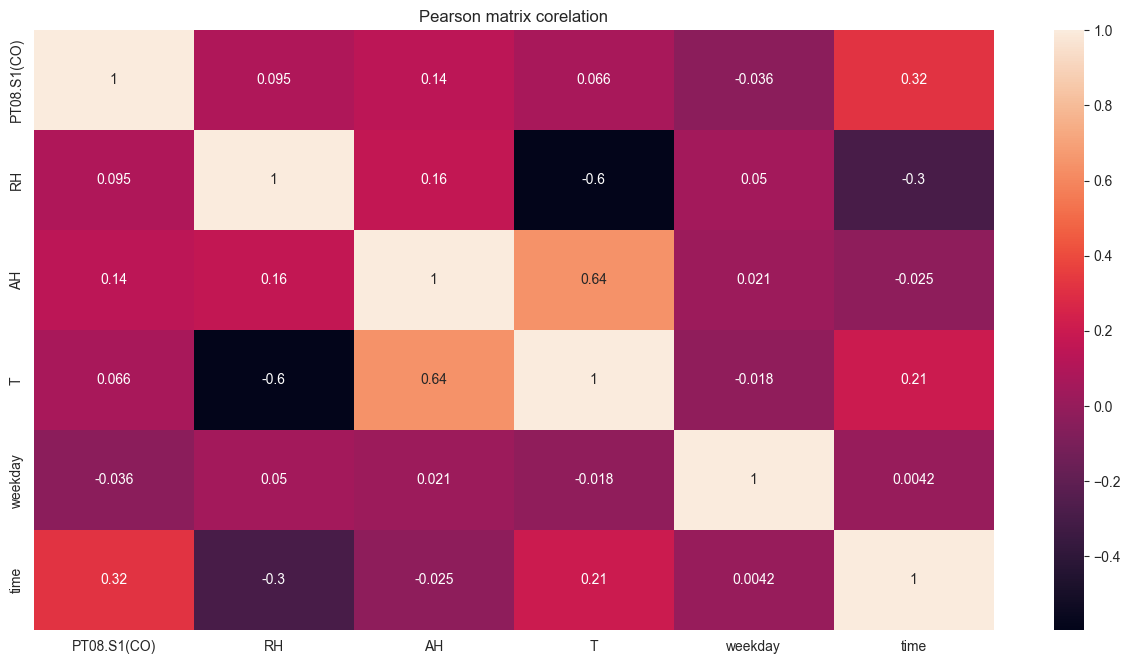

In [49]:
fig,axs = plt.subplots(nrows=1, ncols=1, figsize= (15, 6))
plt.subplots_adjust(left=0.1, bottom=0.1,right=0.9,top=1.1,wspace=0.4, hspace=0.4)

pearson_correlation = (df.corr(method='pearson',numeric_only=True))

plt.title("Pearson matrix corelation")
sns.heatmap(pearson_correlation,annot=True)

plt.show()

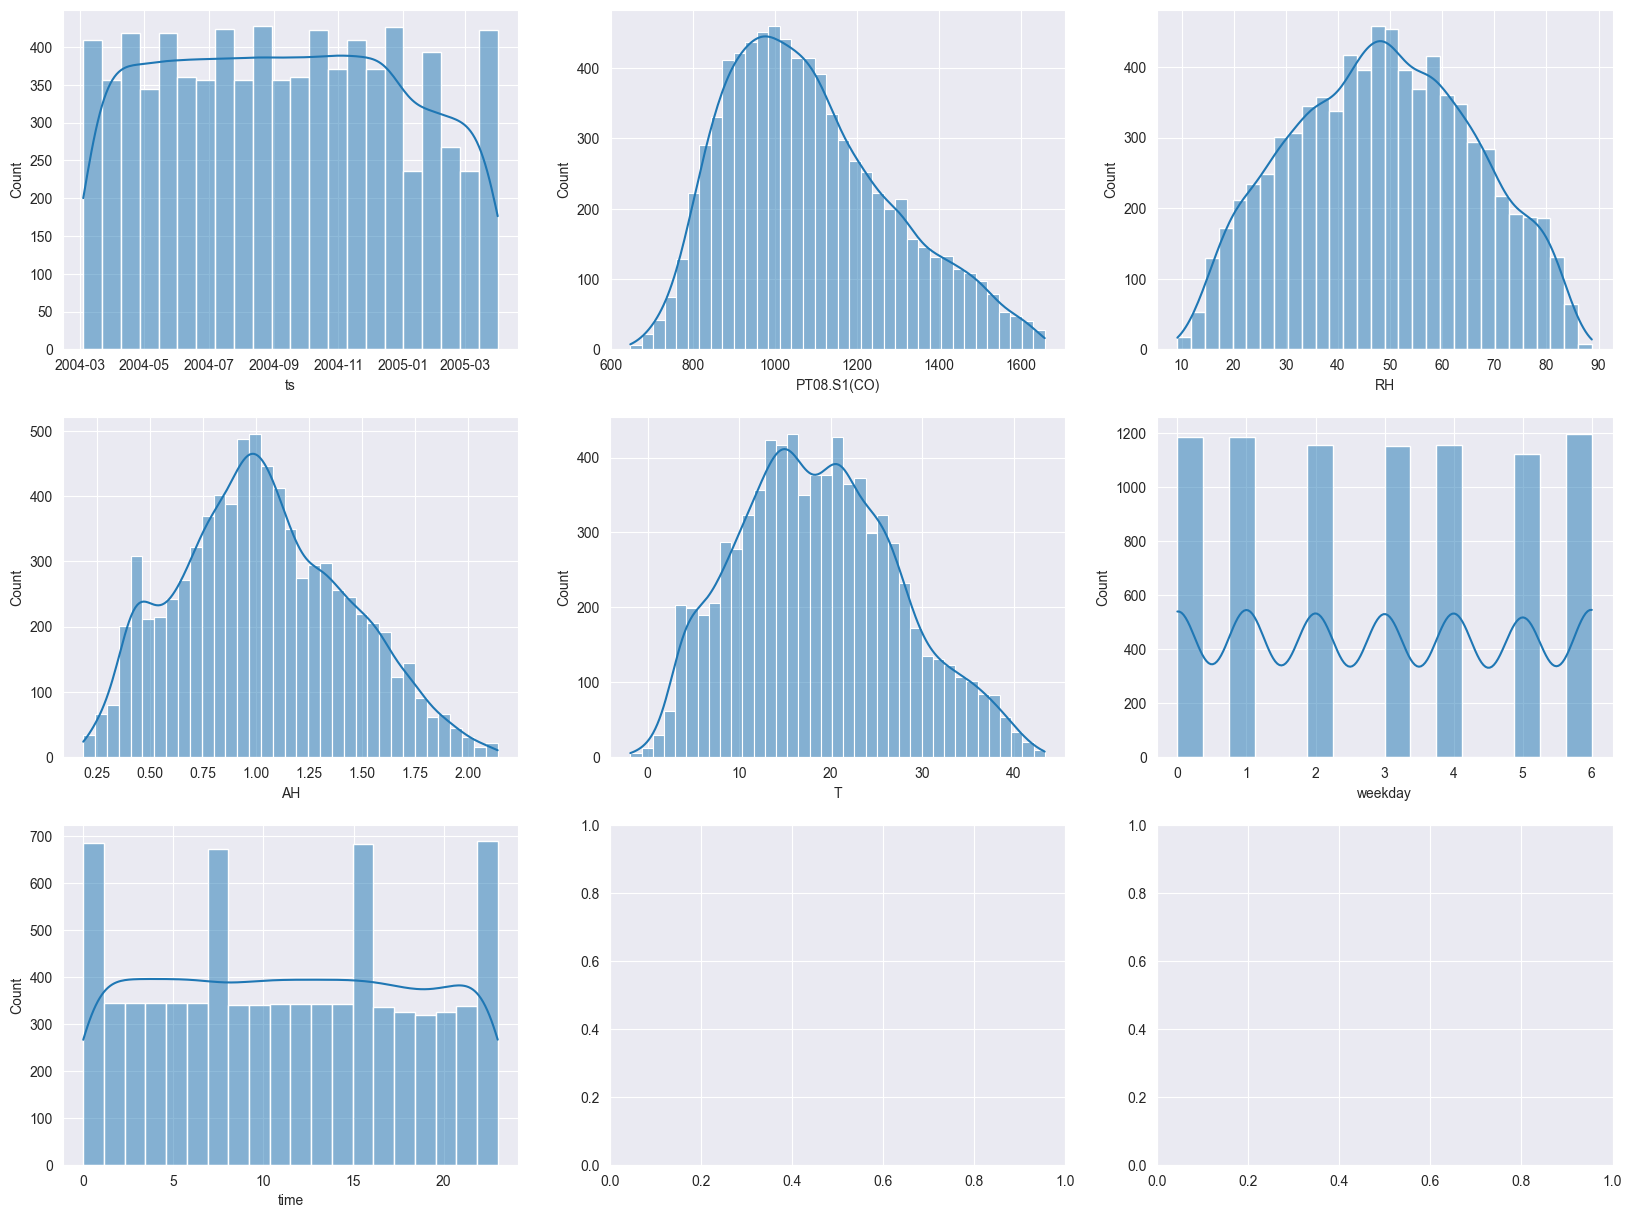

In [50]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(20, 15))
axs = axs.ravel()
for i, c in enumerate(df.columns):
    sns.histplot(df, x=c, ax = axs[i], kde=True)

In [51]:
df

,ts,PT08.S1(CO),RH,AH,T,weekday,time
0,2004-03-04 00:00:00,1254.0,51.8,0.9990,17.1,3,0
1,2004-03-04 01:00:00,1141.0,54.2,0.9933,16.2,3,1
2,2004-03-04 02:00:00,1141.0,58.2,0.9886,15.1,3,2
3,2004-03-04 03:00:00,1042.0,57.6,0.9796,15.1,3,3
4,2004-03-04 04:00:00,986.0,58.0,0.9488,14.5,3,4
...,...,...,...,...,...,...,...
8140,2005-03-31 19:00:00,1102.0,45.2,0.9123,17.8,3,19
8141,2005-03-31 20:00:00,976.0,47.3,0.8686,16.3,3,20
8142,2005-03-31 21:00:00,895.0,44.8,0.8244,16.3,3,21
8143,2005-03-31 22:00:00,886.0,47.1,0.8273,15.6,3,22


In [52]:
#to continue we set back ts as index
df.set_index('ts', inplace=True)
df.sort_index(inplace=True)

In [53]:
NORMALIZE=False
LOG = False
colname='RH'
if NORMALIZE: 
    df[colname] = MinMaxScaler().fit_transform(df[colname].values.reshape(-1,1))
if LOG:
    df[colname] = np.log(df[colname]+1)
    
train_cutoff = int(0.70*df.shape[0])
train_df = df.iloc[:train_cutoff][[colname]].copy()
test_df = df.iloc[train_cutoff:][[colname]].copy()

<AxesSubplot: xlabel='ts', ylabel='RH'>

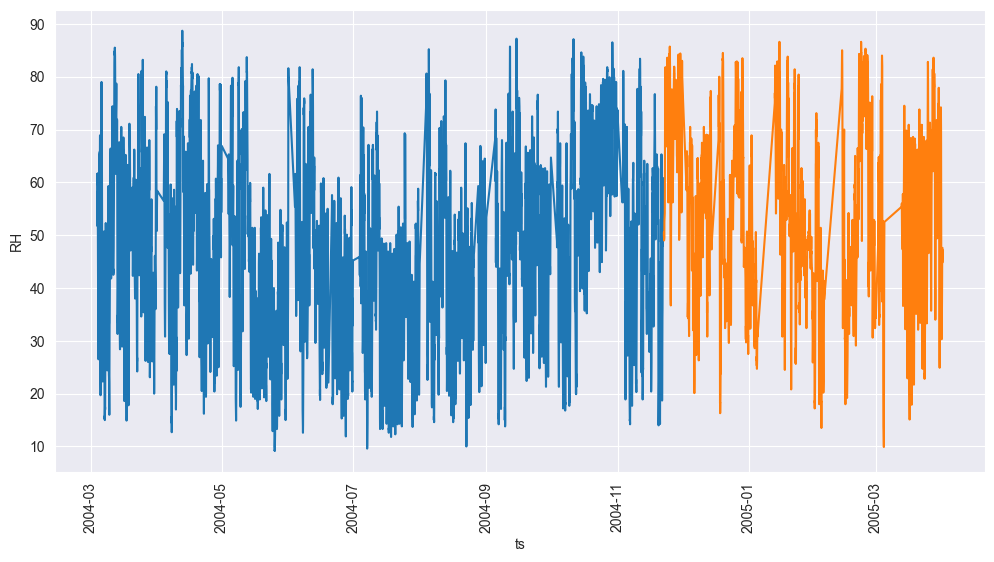

In [54]:
fig = plt.figure(figsize=(12, 6))

plt.xticks(rotation= 90)
plt.xticks(rotation= 90)
# plt.yticks(range(df[colname].min(), df[colname].max()))
sns.lineplot(train_df, x = 'ts', y=colname)
sns.lineplot(test_df, x = 'ts', y=colname)

In [55]:
df

,PT08.S1(CO),RH,AH,T,weekday,time
ts,,,,,,
2004-03-04 00:00:00,1254.0,51.8,0.9990,17.1,3,0
2004-03-04 01:00:00,1141.0,54.2,0.9933,16.2,3,1
2004-03-04 02:00:00,1141.0,58.2,0.9886,15.1,3,2
2004-03-04 03:00:00,1042.0,57.6,0.9796,15.1,3,3
2004-03-04 04:00:00,986.0,58.0,0.9488,14.5,3,4
...,...,...,...,...,...,...
2005-03-31 19:00:00,1102.0,45.2,0.9123,17.8,3,19
2005-03-31 20:00:00,976.0,47.3,0.8686,16.3,3,20
2005-03-31 21:00:00,895.0,44.8,0.8244,16.3,3,21


Buliding model

In [56]:

# classification
X, y = make_classification(n_samples=1000, n_features=10, random_state=RANDOM_STATE)

# training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)

#  HistGradientBoostingClassifier object with  parameters
clf = HistGradientBoostingClassifier(random_state=RANDOM_STATE, learning_rate=0.1, loss='log_loss')

# Fit model on the training data
clf.fit(X_train, y_train)

# Evaluate  model on the testing data
score = clf.score(X_test, y_test)

print("Accuracy is: {:.2f} %".format(score * 100))


Accuracy is: 95.50 %
